In [1]:
import yaml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# plt.style.use(['science','ieee'])

In [4]:
with open("result.yaml", "r") as stream:
    try:
        data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [5]:
data

{'env': {'system': ['5.10.0-16-cloud-amd64 \\#1 SMP Debian 5.10.127-1 (2022-06-30) x86_64 GNU/Linux',
   'debian-11-bullseye-v20220719',
   'e2-small google cloud'],
  'setup': [{'IP': '34.124.233.195, 34.126.134.69, 35.198.220.142'},
   {'signal_server': '34.126.134.69'},
   {'turn_server': '34.126.134.69'},
   {'Normal_ping': [{'OneTwo': 'rtt min/avg/max/mdev = 0.524/0.593/0.688/0.049 ms'},
     {'OneThree': 'rtt min/avg/max/mdev = 0.633/0.742/1.100/0.143 ms'},
     {'TwoThree': 'rtt min/avg/max/mdev = 0.622/0.757/0.885/0.081 ms'}]},
   {'Latency control': '(Not src/dst symmetric latency but still very neat way to simulate RTT latency between 2 peers)\ntc qdisc add dev ens4 root handle 1: prio priomap 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2\ntc qdisc add dev ens4 parent 1:1 handle 10: netem delay 4ms\ntc filter add dev ens4 protocol ip parent 1:0 prio 1 u32 match ip dst 35.198.220.142/32 flowid 1:1\n'}],
  'latency_setup': [{'4ms': 'rtt min/avg/max/mdev = 4.719/4.894/5.597/0.282 ms'},
   {'8

In [9]:
norm_data = defaultdict(dict)
for test in data["WebRTC"]:
    if test == "STUN,client_delay": continue
    for latency in data["WebRTC"][test]:
        times = data["WebRTC"][test][latency]
        avg_time = np.mean([float(t) for t in times.split(",")])
        norm_data["WebRTC_"+test][latency] = round(avg_time)
for latency in data["WebSocket"]["server_delay"]:
    times = data["WebSocket"]["server_delay"][latency]
    avg_time = np.mean([float(t) for t in times.split(",")])
    norm_data["WebSocket_server_delay"][latency] = round(avg_time)    
print(norm_data)
df = pd.DataFrame.from_dict(norm_data, orient='index', columns=['0ms', '4ms', '8ms', '12ms', '16ms'])
df = df.transpose()
print(df)

defaultdict(<class 'dict'>, {'WebRTC_NoSTUN,P2P_delay': {'0ms': 3, '4ms': 7, '8ms': 11, '12ms': 15, '16ms': 19}, 'WebRTC_NoSTUN,signal_delay': {'0ms': 3, '4ms': 3, '8ms': 3, '12ms': 3, '16ms': 3}, 'WebRTC_STUN,TURN_delay': {'0ms': 4, '4ms': 12, '8ms': 20, '12ms': 28, '16ms': 37}, 'WebSocket_server_delay': {'0ms': 5, '4ms': 12, '8ms': 20, '12ms': 29, '16ms': 37}})
      WebRTC_NoSTUN,P2P_delay  WebRTC_NoSTUN,signal_delay  \
0ms                         3                           3   
4ms                         7                           3   
8ms                        11                           3   
12ms                       15                           3   
16ms                       19                           3   

      WebRTC_STUN,TURN_delay  WebSocket_server_delay  
0ms                        4                       5  
4ms                       12                      12  
8ms                       20                      20  
12ms                      28                   

Text(0.5, 0, 'simulated latency')

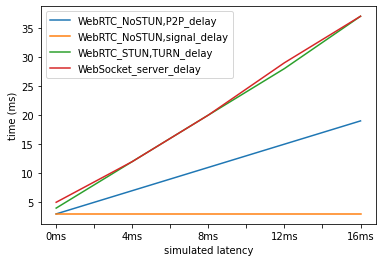

In [12]:
ax = df.plot(use_index=True, ylabel="time (ms)")
ax.set_xlabel("simulated latency")

(0.0, 90000.0)

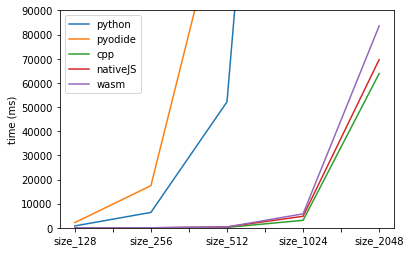

In [25]:
ax = df.plot(use_index=True, ylabel="time (ms)")
ax.set_ylim(0, 90000)